# House Prices: Exploratory Data Analysis

Greetings! In this notebook we will explore the Ames house price data, identifying important characteristics and noting where pre-processing will be required. The purpose of this work is to lay the groundwork for later data cleaning and transformation, with the end goal of applying various machine learning strategies.

Thank you for reading and please leave a comment below if you have any suggestions. I am always learning and appreciate your feedback.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats

# Prevent Pandas from truncating displayed dataframes
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

sns.set(style="white", font_scale=1.2)
plt.rcParams["figure.figsize"] = [10,8]

**Load the Data**

In [2]:
train = pd.read_csv("assets/train.csv")
test = pd.read_csv("assets/test.csv")
submission = pd.read_csv("assets/sample_submission.csv")

**Preview the Data**

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Observe the Data Structure & Expected Output**

Let's look at the sample submission. This shows us what our model will need to output: a sale price for each `Id` in the test set.

In [4]:
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


To accomplish this task, must train a model using the train dataset and predict values for each observation in the test dataset. What are the sizes of each of these datasets?

In [5]:
print("Training Size: {} observations, {} features\nTest Size: {} observations, {} features\n".format(train.shape[0], train.shape[1], test.shape[0], test.shape[1]))

Training Size: 1460 observations, 81 features
Test Size: 1459 observations, 80 features



We can see that there the training and test sets are roughly the same size (around 1460 rows). We have a large number of features (80), some of which might be candidates for deletion.

In [6]:
set(train.columns) - set(test.columns)

{'SalePrice'}

As expected, the test set is missing the `SalePrice` column. This is the target variable that we are tasked to predict.

The `.describe()` method allows us to quickly eyeball various statistics for each feature, including min, median and max.

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


What numeric features do we have?

In [8]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

And what categorical features do we have?

In [9]:
categorical_features = train.select_dtypes(include=[np.object])
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

How many different categories are there for each of the categorical variables? Do we have categories that don't appear in both train and test?

In [10]:
unique_categories = pd.DataFrame(index=categorical_features.columns, columns=["TrainCount", "TestCount"])
for c in categorical_features.columns:
    unique_categories.loc[c, "TrainCount"] = len(train[c].value_counts())
    unique_categories.loc[c, "TestCount"] = len(test[c].value_counts())
    
unique_categories = unique_categories.sort_values(by="TrainCount", ascending=False)
unique_categories.head()

,TrainCount,TestCount
Neighborhood,25,25
Exterior2nd,16,15
Exterior1st,15,13
SaleType,9,9
Condition1,9,9


A quick plot of the number of unique categories per feature indicates that different categories are indeed present in train vs. test. Our model will need to handle the case when it encounters a new category that it wasn't originally trained on.

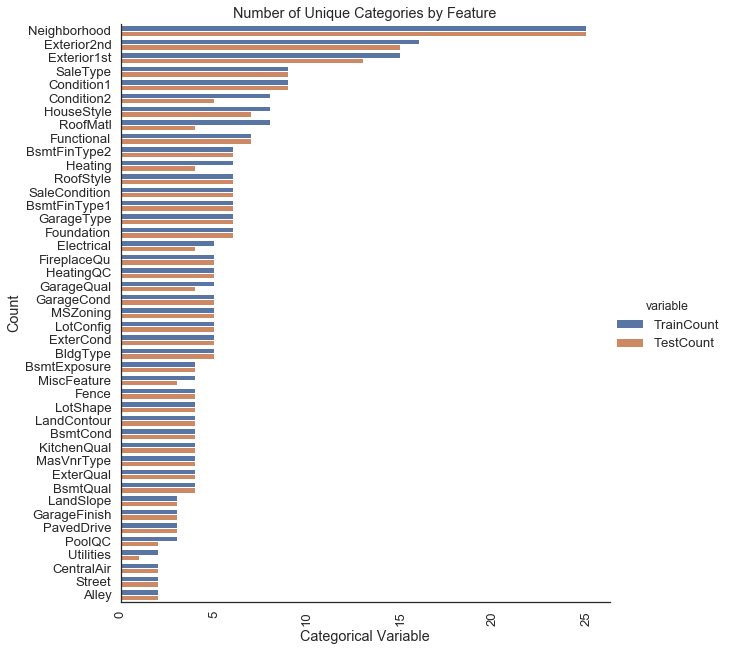

In [11]:
temp = pd.melt(unique_categories.reset_index(), id_vars="index")
g = sns.catplot(y="index", x="value", hue="variable", data=temp, kind="bar", height=9)
g.set_ylabels("Count")
g.set_xlabels("Categorical Variable")
g.set_xticklabels(rotation=90)
plt.title("Number of Unique Categories by Feature")
plt.show()

**Check for Nulls**

Missing values introduce bias into our dataset and can lead to biased conclusions or predictions. There are a variety of methods that can be used to deal with missing values, but first, let's just see which features contain N/As.

In [12]:
nulls = train.isnull().sum()[train.isnull().sum() > 0].sort_values(ascending=False).to_frame().rename(columns={0: "MissingVals"})
nulls["MissingValsPct"] = nulls["MissingVals"] / len(train)
nulls

,MissingVals,MissingValsPct
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


`PoolQC`, `MiscFeature` and `Alley` are all missing a significant number of values (>90%) - these features are candidates for deletion as there is likely little information contained within the remaining entries.

Notice how the `Garage_` and `Bsmt_` variables have similar numbers of missing values. One possibility is that these missing values originate from the same set of observations.

It can be helpful to view the percentage of missing values in a bar chart, to get a sense of the relativities.

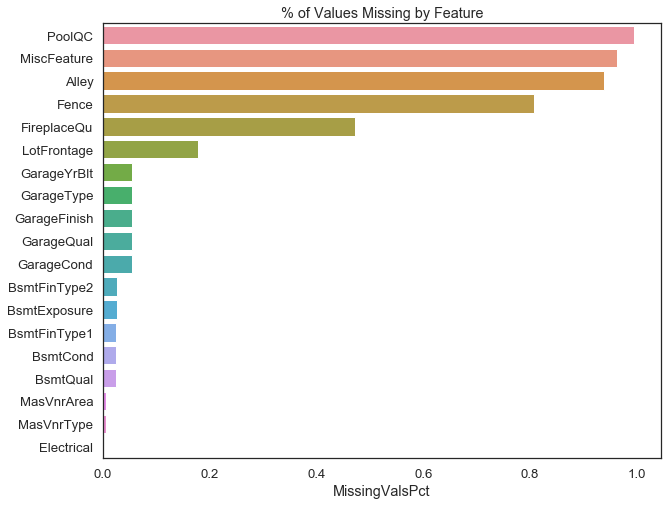

In [13]:
sns.barplot(y=nulls.index, x=nulls["MissingValsPct"], orient="h")
plt.title("% of Values Missing by Feature")
plt.show()

We can also observe the co-occurrence of nulls across features. This exhibit confirms our theory that `Bsmt_` and `Garage_` nulls tend to occur within the same observations (see the bands of horizontal white lines).

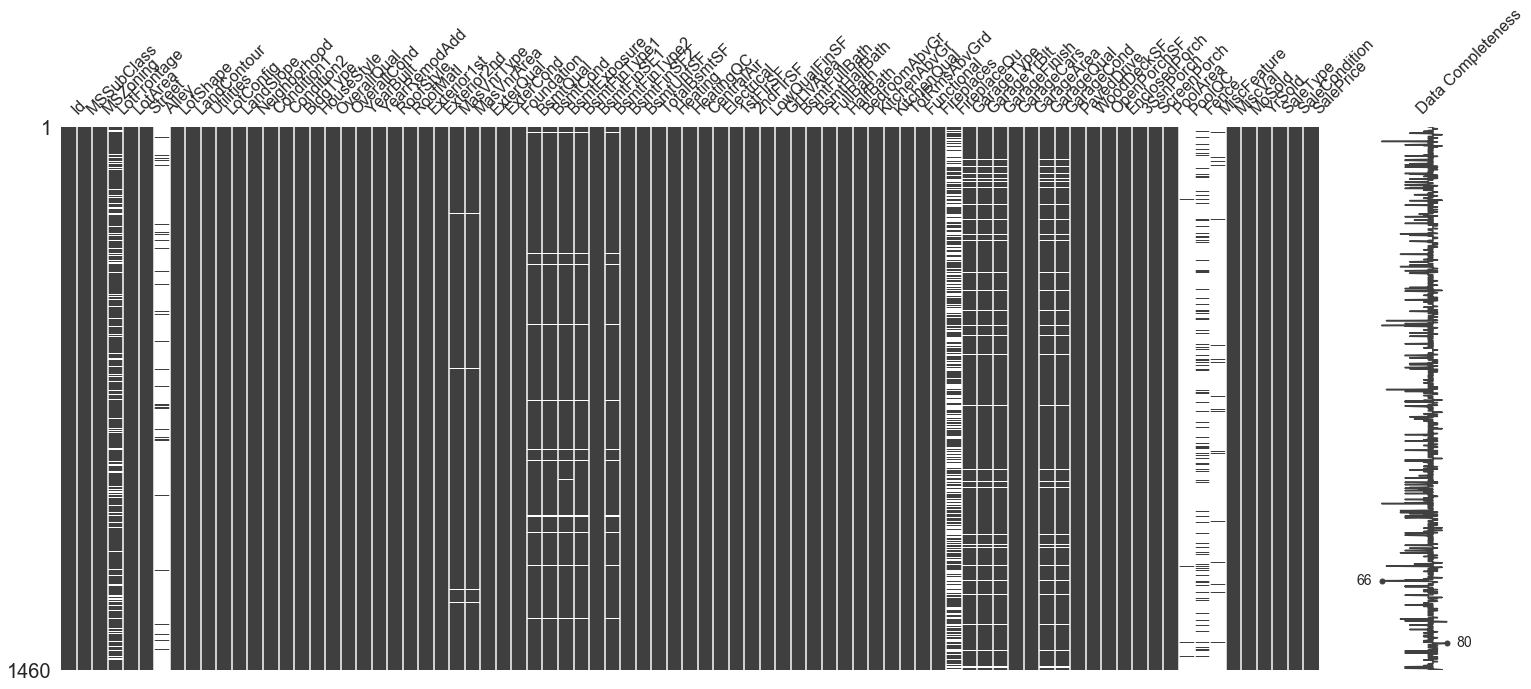

In [14]:
msno.matrix(train, labels=True)
plt.show()

**Check for Outliers**

One way to check for outliers is by calculating the Z-score, which represents the number of standard deviations away from the observed mean value. Typically, if $|Z-score| > 3$, the data point is considered an outlier. We may choose to remove these rows prior to training, however we will need to weigh the cost of deleting datapoints for our model.

In [15]:
z_threshold = 3
z = pd.DataFrame(np.abs(stats.zscore(train[numeric_features.columns])))
outlier_rows = z[z[z > z_threshold].any(axis=1)] # Rows with outliers
print("# Rows with potential outliers: {}".format(len(outlier_rows)))
outlier_rows.head()

# Rows with potential outliers: 423


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
1,1.728492,0.872563,NaN,0.091886,0.071836,2.179628,0.156734,0.429577,NaN,1.171992,0.288653,0.641228,0.466465,0.257140,0.795163,0.120242,0.482512,0.819964,3.948809,0.789741,0.761621,0.163779,0.211454,0.318683,0.600495,NaN,0.311725,0.060731,1.626195,0.704483,0.359325,0.116339,0.270208,0.068692,0.087688,0.489110,0.614439,0.007288
3,1.723747,0.309859,NaN,0.096897,0.651479,0.517200,1.863632,0.720298,NaN,0.499274,0.288653,0.061670,0.687324,0.521734,0.937276,0.120242,0.383659,1.107810,0.241061,1.026041,0.761621,0.163779,0.211454,0.296763,0.600495,NaN,1.650307,0.790804,0.752176,0.176048,4.092524,0.116339,0.270208,0.068692,0.087688,1.599111,1.367655,0.515281
5,1.719002,0.163109,NaN,0.360616,0.795151,0.517200,0.719786,0.491040,NaN,0.632450,0.288653,1.139286,0.596115,0.948691,0.501875,0.120242,0.292145,1.107810,0.241061,1.026041,1.227585,2.288708,0.211454,0.934130,0.951226,NaN,0.311725,0.032844,0.432931,0.251539,0.359325,10.802446,0.270208,0.068692,1.323736,1.360892,0.891994,0.477505
7,1.714256,0.073375,NaN,0.013513,0.651479,0.381743,0.057371,0.574938,NaN,0.910994,0.090220,0.795173,0.113032,0.143941,1.457466,0.120242,1.093729,1.107810,0.241061,0.789741,1.227585,0.163779,0.211454,0.296763,2.152216,NaN,0.311725,0.051559,1.123385,2.375537,3.372372,0.116339,0.270208,0.068692,0.618024,1.730892,0.891994,0.240241
8,1.711883,0.163109,NaN,0.440659,0.651479,0.517200,1.333700,1.689368,NaN,0.973018,0.288653,0.871057,0.240402,0.363889,0.928110,0.120242,0.492168,0.819964,0.241061,0.789741,0.761621,1.062465,4.328579,0.912210,2.152216,NaN,0.311725,0.023301,0.033876,0.704483,2.995929,0.116339,0.270208,0.068692,0.087688,0.859110,0.138777,0.642461


**Observe the Target Distribution**

It's important to understand the variable that we are trying to predict. Below, we see that the distribution of `SalePrice` is right skewed, indicating the presence of outliers (unusually high-priced homes); we can also observe these outliers in a box plot. Lastly, we create a Q-Q to confirm that the `SalePrice` distribution does not follow a normal distribution. Since linear models generally work best with normally distributed data, we will need to manipulate `SalePrice`, for example by taking a log-transformation.

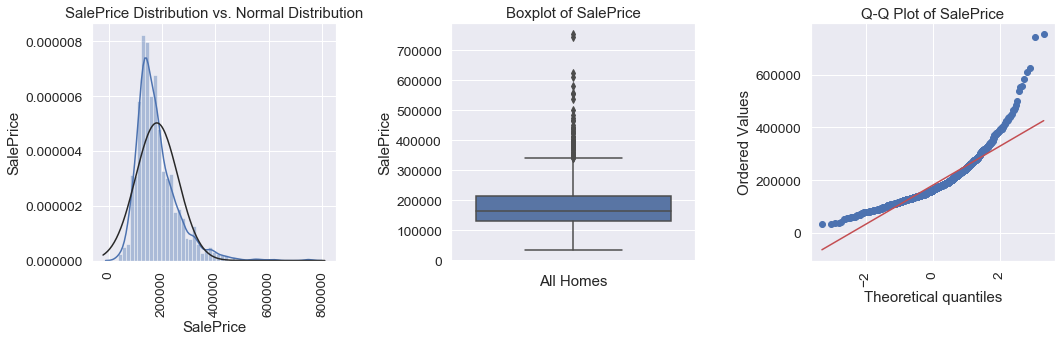

In [39]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.distplot(train["SalePrice"], ax=ax[0], fit=stats.norm)
sns.boxplot(train["SalePrice"], orient='v', ax=ax[1])
stats.probplot(train["SalePrice"], plot=plt)

ax[0].set_title("SalePrice Distribution vs. Normal Distribution")
ax[1].set_title("Boxplot of SalePrice")
ax[2].set_title("Q-Q Plot of SalePrice")
ax[0].set_ylabel("SalePrice")
ax[1].set_xlabel("All Homes")

for a in ax:
    for label in a.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()
plt.show()

After apply a log-transformation, the `SalePrice` distribution is no longer skewed and our outliers are more evenly distributed. Likewise, our Q-Q plot indicates the data is close to normally distributed.

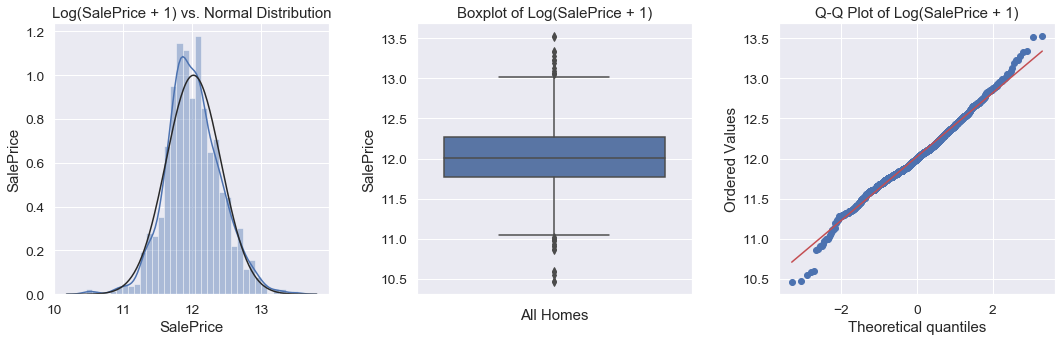

In [38]:
log_SalePrice = np.log1p(train["SalePrice"]) # Applies log(1+x) to all elements of column
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.distplot(log_SalePrice, ax=ax[0], fit=stats.norm)
sns.boxplot(log_SalePrice, orient='v', ax=ax[1])
stats.probplot(log_SalePrice, plot=plt)

ax[0].set_title("Log(SalePrice + 1) vs. Normal Distribution")
ax[1].set_title("Boxplot of Log(SalePrice + 1)")
ax[2].set_title("Q-Q Plot of Log(SalePrice + 1)")
ax[0].set_ylabel("SalePrice")
ax[1].set_xlabel("All Homes")


plt.tight_layout()
plt.show()

**Observe Numerical Feature Correlation with a Heatmap**

Diving into the numerical features, we use a heatmap to quickly visualize which variables are correlated (move together).

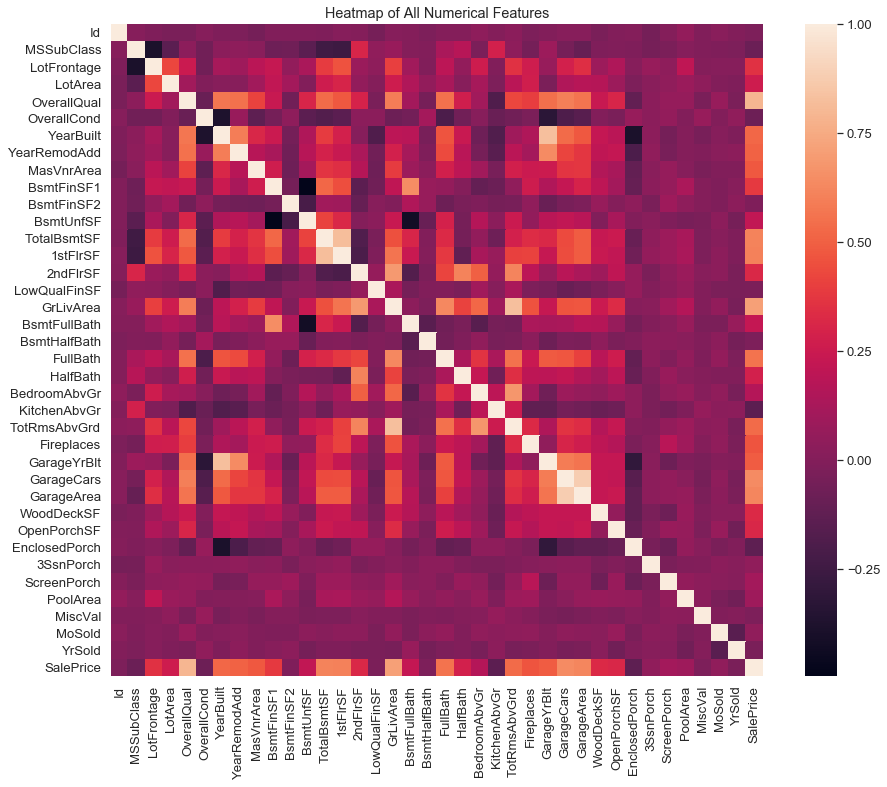

In [17]:
fig = plt.figure(figsize=(15,12))
corr_matrix = train.corr()
sns.heatmap(corr_matrix, square=True)
plt.title("Heatmap of All Numerical Features")
plt.show()

Notice the significant correlation between `TotalBsmtSF`/`1stFlrSF` and `GarageCars`/`GarageArea`. This indicates that these features provide almost the same information; we may choose to use just one or the other. Let's isolate the features with highest correlation so their interrelationships are easier to see.

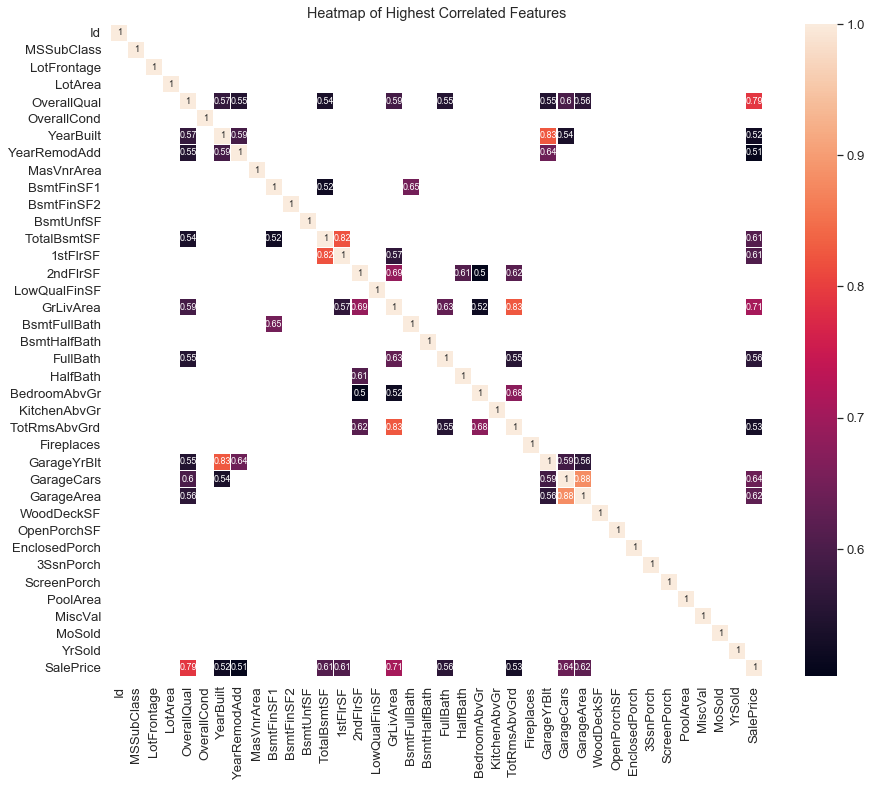

In [18]:
fig = plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)], annot=True, annot_kws={"size": 9}, linewidths=0.1, square=True)
plt.title("Heatmap of Highest Correlated Features")
plt.show()

Does it make sense that some of these variables are highly correlated?

* `GarageCars` and `GarageArea`: Since the number of cars that can fit in a garage is a byproduct of the garage's area, we expect these features to be correlated.
* `YearBuilt` and `GarageYrBlt`: This one is more a by-product of the fact that the garage must have been built the same year or sometime after the house was built.
* `TotalBsmtSF` and `1stFlrSF`: We would expect that the total basement square footage and 1st floor square footage are related.
* `GrLiveArea` and `TotRmsAbvGrd`: Again, this makes sense. More rooms, more living space.

We can also "zoom in" to examine variables with the highest correlation; below we see the 10 variables that are most positively correlated with `SalePrice`, including `OverallQual` and `GrLivArea`.

Finally, on a final feature selection note, `Id` can probably be safely deleted as it is simply a auto-incrementing label for each observation.

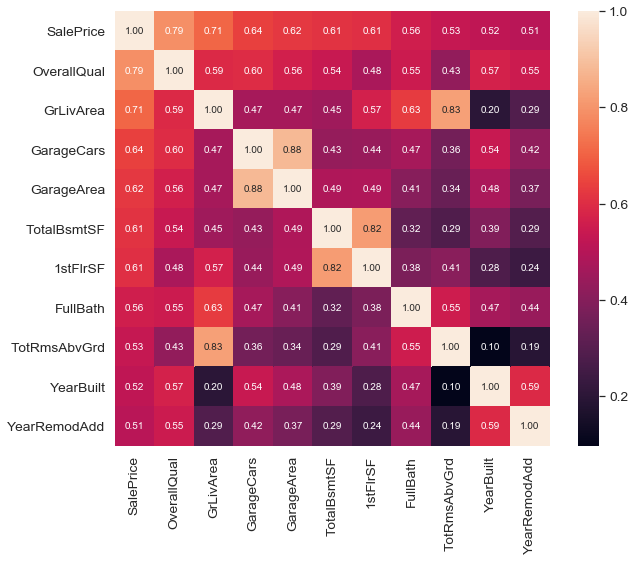

In [19]:
k = 11 #number of variables for heatmap (including SalePrice)
cols_positive = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols_positive].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols_positive.values, xticklabels=cols_positive.values)
plt.show()

And likewise, the 10 variables which are most negatively correlated with SalePrice.

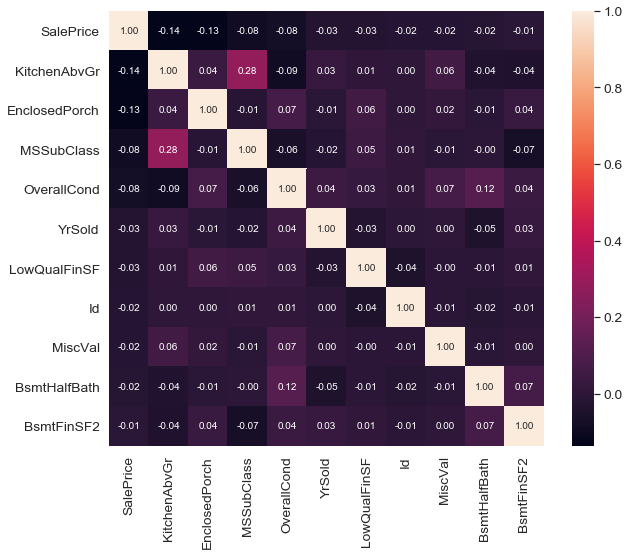

In [20]:
k = 10 #number of variables for heatmap
cols_negative = np.append(['SalePrice'], corr_matrix.nsmallest(k, 'SalePrice')['SalePrice'].index.values)
cm = np.corrcoef(train[cols_negative].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols_negative, xticklabels=cols_negative)
plt.show()

Let's create a pairplot using the positively correlated features that we identified. Take a moment to look at some of the plots to see if you can explain the relationship between various features.

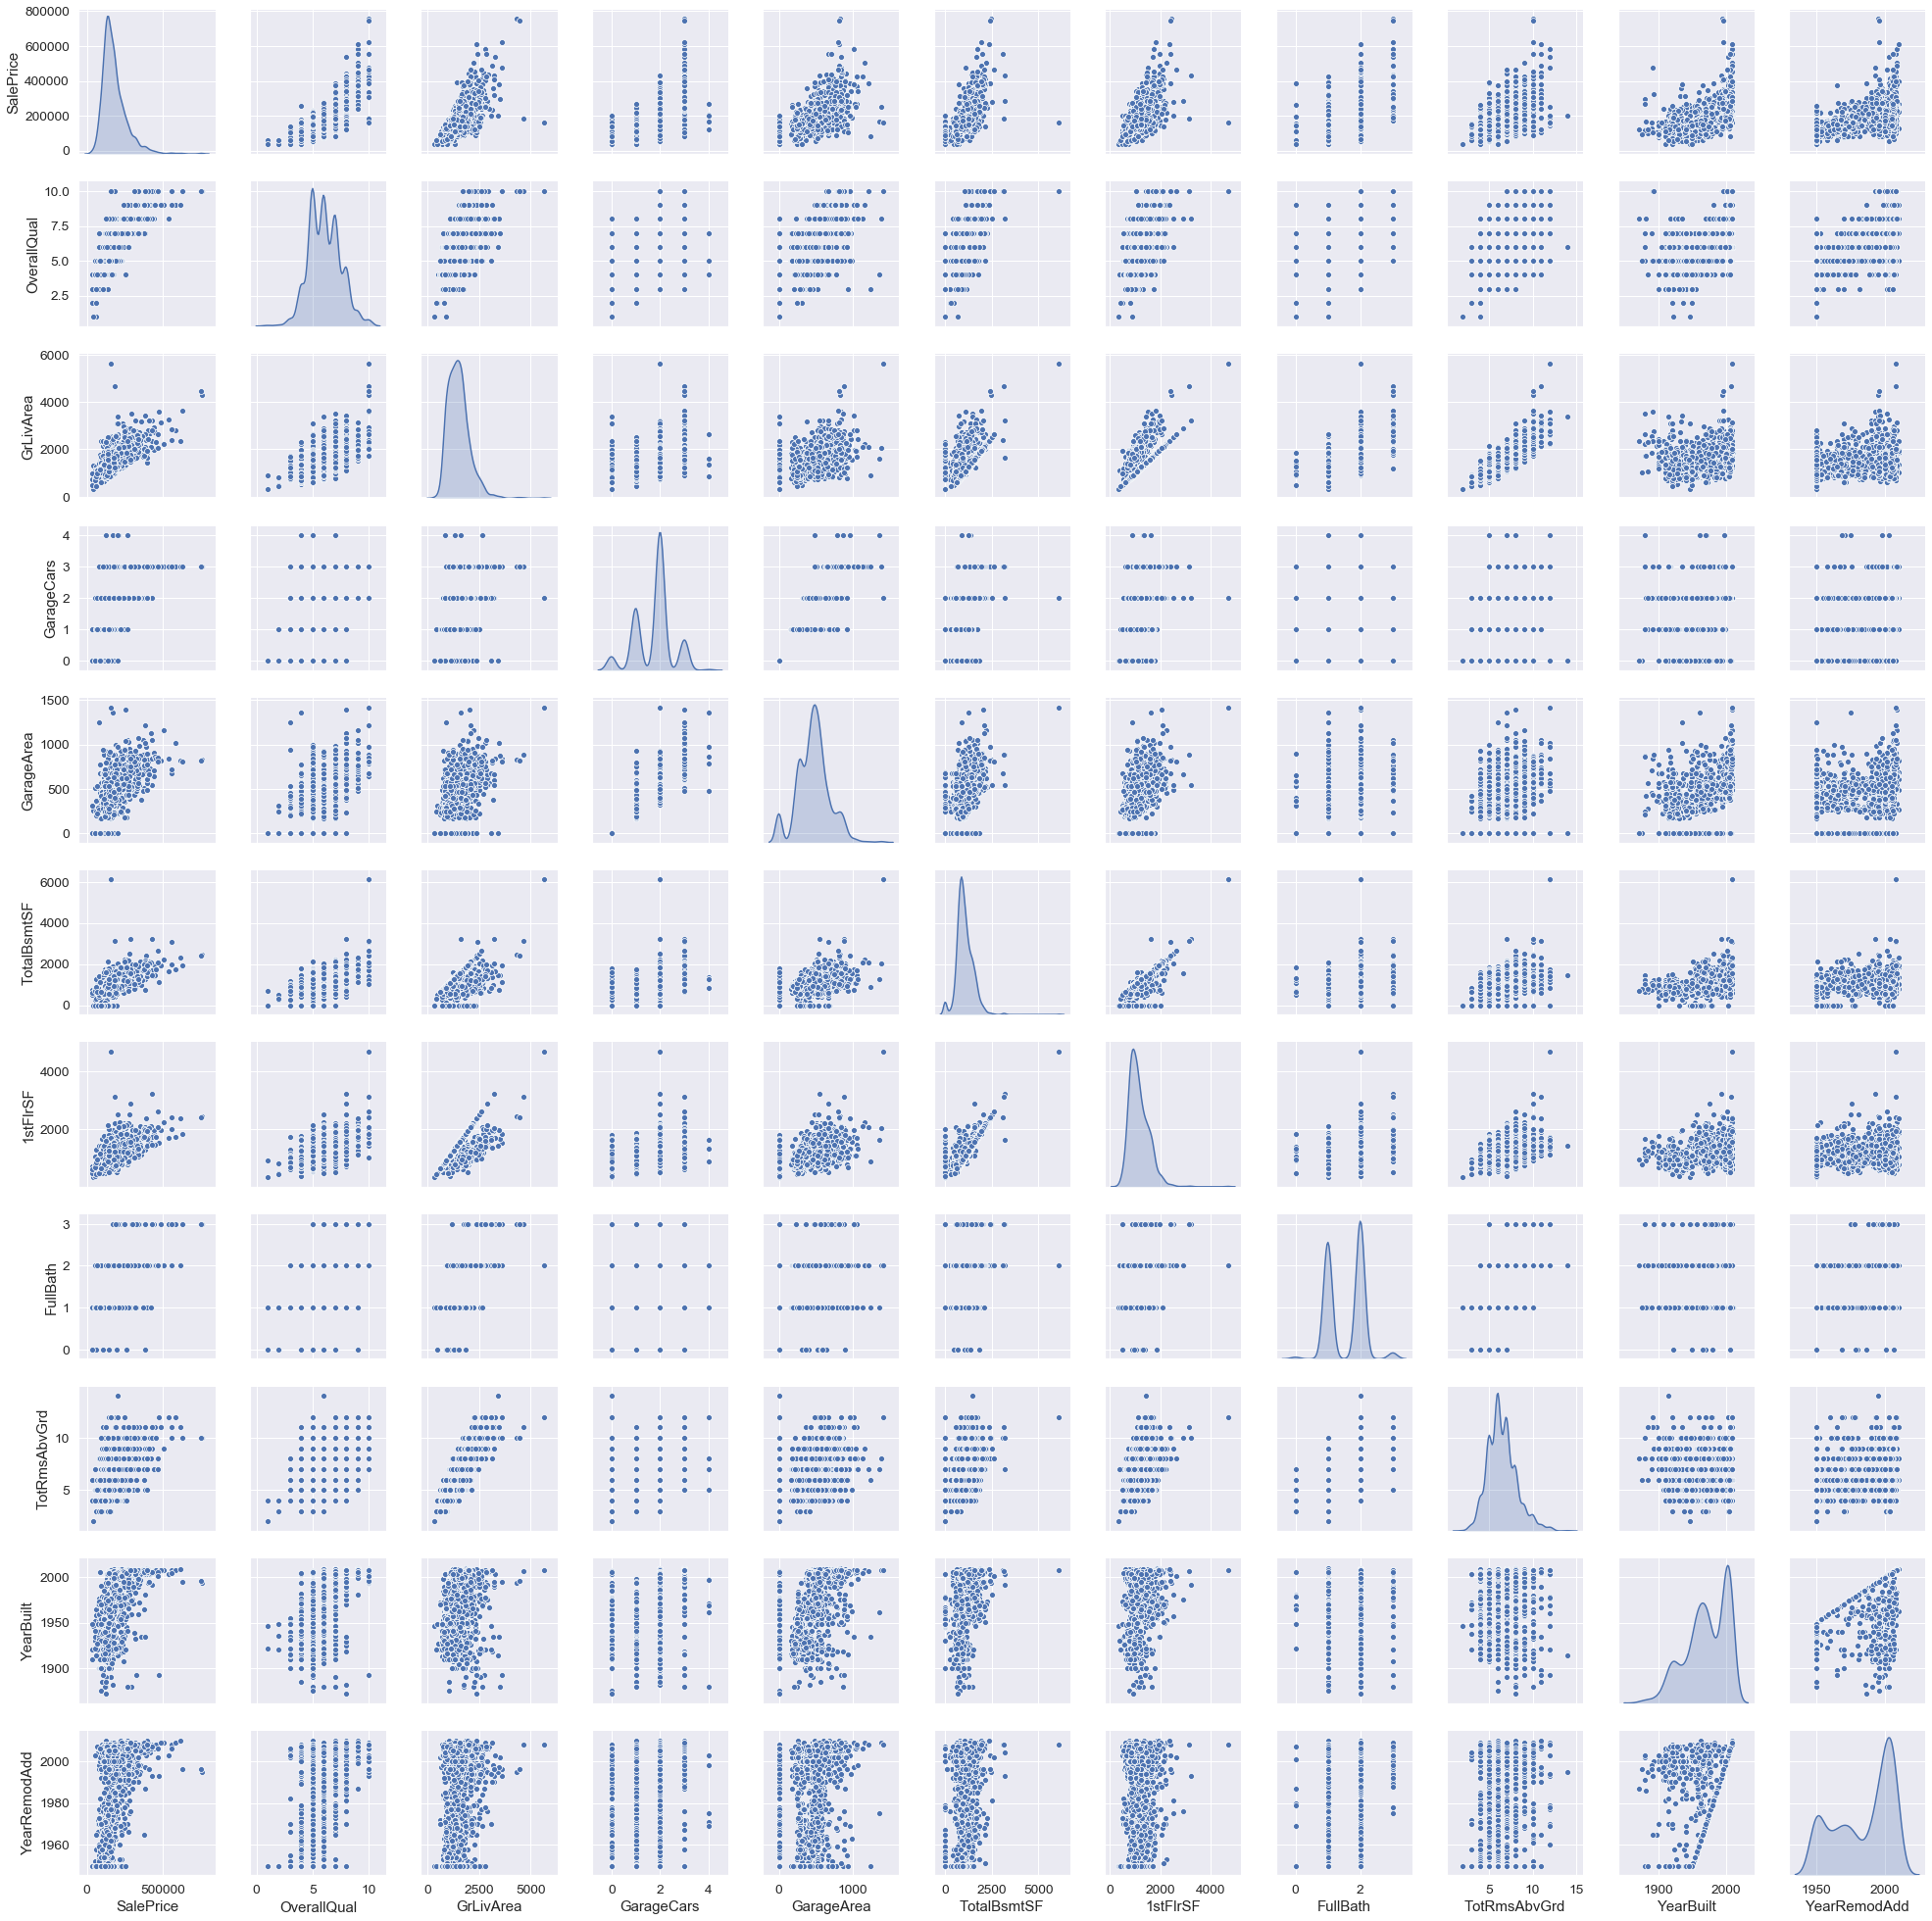

In [21]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
sns.pairplot(train[cols_positive], diag_kind='kde')
plt.show()

**Observe Categorical Features with Box Plots**

What about the categorical features? Let's use box plots to see which features might be helpful in predicting `SalePrice`.

First, we'll need to create a new category for missing values.

In [22]:
x = train.copy()
for c in categorical_features.columns:
    x[c] = x[c].astype('category')
    if x[c].isnull().any():
        x[c] = x[c].cat.add_categories(['Missing'])
        x[c] = x[c].fillna('Missing')
x["SalePrice"] = train["SalePrice"]
x.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


Now we can generate box plots. Note that by creating a category for missing values, we are able to view the distribution of sale price for those observations.

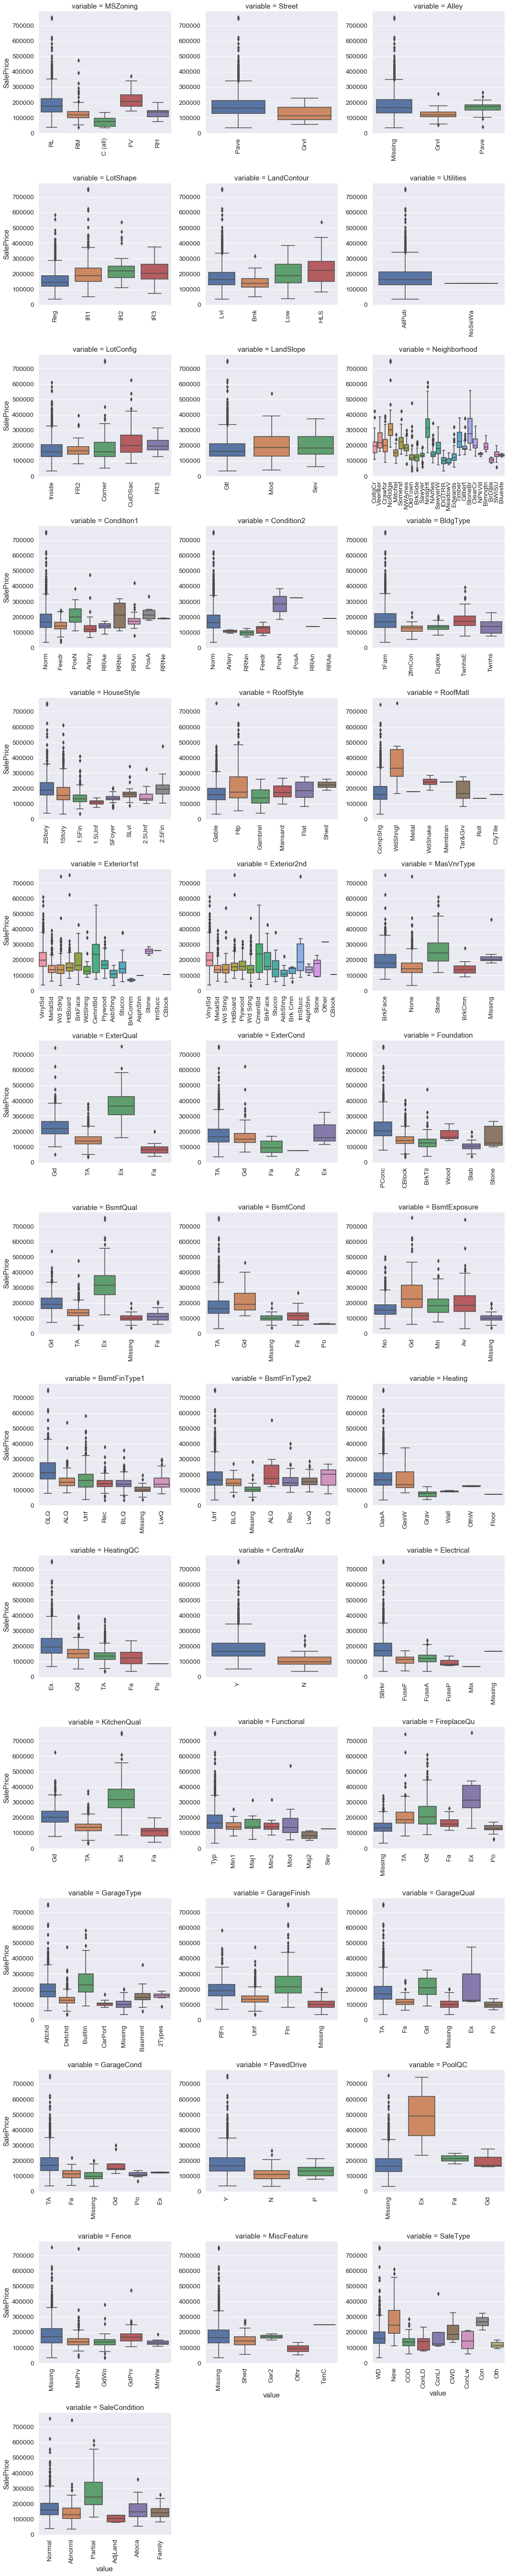

In [23]:
def boxplot_custom(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x = plt.xticks(rotation=90)

df = pd.melt(x, id_vars=["SalePrice"], value_vars=categorical_features)
g = sns.FacetGrid(df, col="variable", col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(boxplot_custom, "value", "SalePrice")

Because there are so many categorical variables, we will likely need to identiy and utilize only the categorical variables that have the strongest correlation with the target. Alternatively, we might choose to include all variables and use penalty-based automated variable selection, such as lasso or ridge regression, to prioritize the most salient features. Topics for future notebooks :)

**Conclusion**

Thank you very much for reading - I hope you learned a trick or two. 

Suggestions? Comments? Please leave me a note below.

Until next time, happy coding :)